In [2]:
import psycopg2
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
import matplotlib
import warnings
import yellowbrick as yb
%matplotlib inline

warnings.simplefilter(action='ignore', category=FutureWarning)

C:\Users\Michael\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
conn = psycopg2.connect( 
                        host = 'project.cgxhdwn5zb5t.us-east-1.rds.amazonaws.com',
                        port = 5432, 
                        user = 'postgres',
                        password = 'Admin123',
                        database = 'postgres')
cursor = conn.cursor()

In [4]:
DEC2FLOAT = psycopg2.extensions.new_type(
    psycopg2.extensions.DECIMAL.values,
    'DEC2FLOAT',
    lambda value, curs: float(value) if value is not None else None)
psycopg2.extensions.register_type(DEC2FLOAT)

In [7]:
cursor.execute('Select * from "ahs_household_class"')
rows = cursor.fetchall()
col_names = []
for elt in cursor.description:
    col_names.append(elt[0])

df = pd.DataFrame(data=rows, columns=col_names )

In [8]:
df.head()

,index,CONTROL,YEAR,RATINGHS_BIN,BEDROOMS,STORIES,PERPOVLVL,HHADLTKIDS,HINCP,UNITSIZE,...,HHSEE,KITCHSINK,HHERRND,WINBARS,HHWALK,HHHEAR,HHSEX,HHMEMRY,GARAGE,DISHWASH


## Balanced Binning

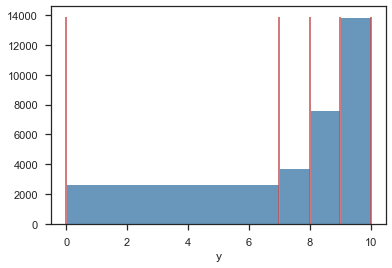

In [20]:
from yellowbrick.datasets import load_concrete
from yellowbrick.target import BalancedBinningReference


# Instantiate the visualizer
visualizer = BalancedBinningReference(bins=[0,7,8,9,10])

y = df['RATINGHS']
visualizer.fit(y)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [21]:


LABEL_MAP = {
    1: "Un-Satisfied",
    2: "Un-Satisfied",
    3: "Un-Satisfied",
    4: "Un-Satisfied",
    5: "Un-Satisfied",
    6: "Un-Satisfied",
    7: "Satisfied",
    8: "Satisfied",
    9: "Highly Satisfied",
    10: "Extreme Satisfied"
}

# Convert class labels into text
df_conv = df['RATINGHS'].map(LABEL_MAP)


In [22]:
#df_sub['RATINGHS'] = df_sub['RATINGHS'].astype(str)
df_conv

0        Extreme Satisfied
1                Satisfied
2         Highly Satisfied
3                Satisfied
4        Extreme Satisfied
               ...        
27909    Extreme Satisfied
27910            Satisfied
27911    Extreme Satisfied
27912            Satisfied
27913     Highly Satisfied
Name: RATINGHS, Length: 27914, dtype: object

### Class Imbalanced

In [23]:
X = df
y = df_conv

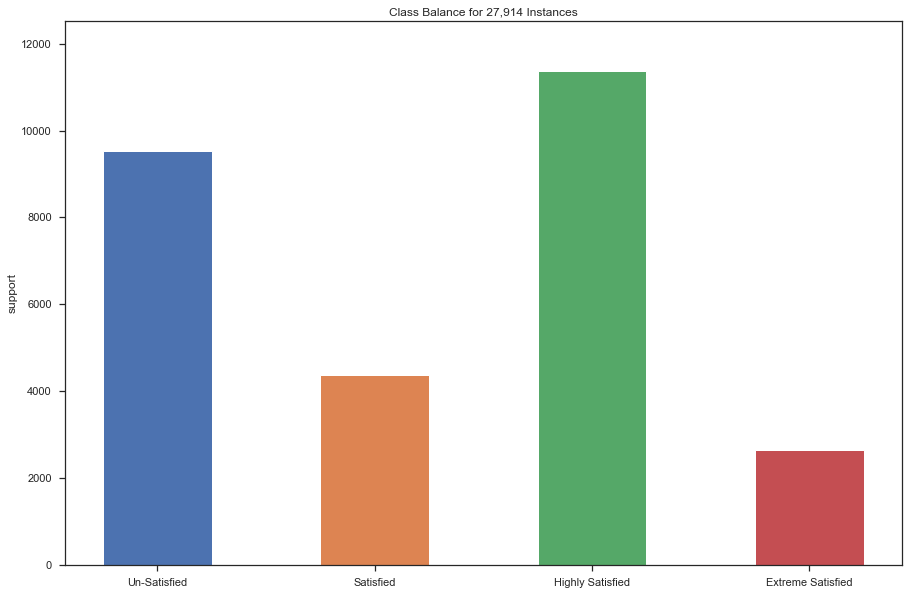

In [24]:
from yellowbrick.target import ClassBalance
X = df
y = df_conv
# Instantiate the visualizer
visualizer = ClassBalance(
    labels=["Un-Satisfied", "Satisfied", "Highly Satisfied","Extreme Satisfied"], size=(1080, 720)
)

visualizer.fit(y)
visualizer.show()

In [25]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

In [26]:
X_sm, y_sm = sm.fit_sample(X, y.ravel())

/Users/sabashaikh/anaconda2/envs/py36/lib/python3.6/site-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')


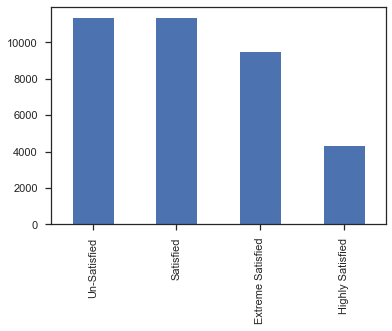

In [27]:
# observe that data has been balanced
pd.Series(y_sm).value_counts().plot.bar()

/Users/sabashaikh/anaconda2/envs/py36/lib/python3.6/site-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')


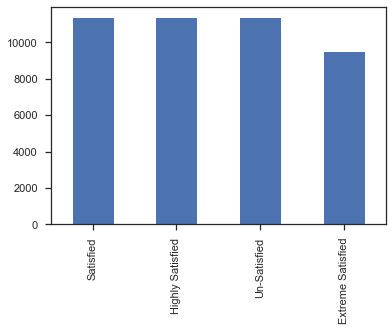

In [28]:
X_sm, y_sm = sm.fit_sample(X_sm, y_sm.ravel())
pd.Series(y_sm).value_counts().plot.bar()

/Users/sabashaikh/anaconda2/envs/py36/lib/python3.6/site-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')


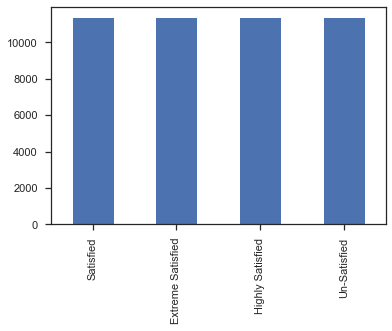

In [29]:
X_sm, y_sm = sm.fit_sample(X_sm, y_sm.ravel())
pd.Series(y_sm).value_counts().plot.bar()